# Exploratory Data Analysis

##### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

/tmp/ipykernel_3837/1500852553.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Import the modified dataframe from the data cleaning notebook


In [2]:
RUTA_DATAFRAME = '../data/interim/df_final.csv'

df = pd.read_csv(RUTA_DATAFRAME, sep=',')

In [3]:
df.head(5)

,CCAA,SEXOa,EDADa,E1_1,E1C,E1E,E2_1a,E2_1b,E2_1c,E2_1d,...,W129,X130,X131,X132,Y133,CLASE_PR,IMC,SEVERIDAD_DEPRESIVA,CUADROS_DEPRESIVOS,dep_anx
0,16.0,1.0,60.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,9.0,4.0,1.0,2.0,0,5.0,2.0,1.0,3.0,0
1,16.0,2.0,87.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,NaN,3.0,1.0,2.0,0,1.0,9.0,3.0,3.0,0
2,16.0,1.0,38.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,9.0,4.0,1.0,4.0,0,4.0,3.0,3.0,2.0,0
3,16.0,2.0,43.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,8.0,2.0,1.0,2.0,1,1.0,2.0,1.0,3.0,0
4,16.0,1.0,41.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,NaN,4.0,1.0,5.0,0,4.0,3.0,1.0,3.0,0


The modified dataframe contains rows: 22072, columns : 342

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22072 entries, 0 to 22071
Columns: 342 entries, CCAA to dep_anx
dtypes: float64(130), int64(212)
memory usage: 57.6 MB


Creating a copy of the imported dataframe to preserve it as more modifications will be conducted:

In [5]:
clean_df = df.copy()

## Loading Json dictionary file


On the notebook json_maker.ipynb we created a json dictionary file 'full_var_dict.json' containing the original variable name, a descriptive variable name, as well as a brief description of each of the variable values. The goal of this file is to ease the EDA and to produce graphs easier to read and understand with informative titles and descriptions of the categories of each variable.

In [6]:
# JSON file source
ruta_json = "../data/json_files/full_var_dict.json"

# loading JSON file
with open(ruta_json, 'r') as archivo:
    varijson = json.load(archivo)

Example of how the JSON file looks: this is the dictionary of the variable CCAA

In [7]:
varijson['CCAA']

{'diccionario': {'01': 'Andalucía',
  '02': 'Aragón',
  '03': 'Asturias, Principado de',
  '04': 'Balears, Illes',
  '05': 'Canarias',
  '06': 'Cantabria',
  '07': 'Castilla y León',
  '08': 'Castilla - La Mancha',
  '09': 'Cataluña',
  '10': 'Comunitat Valenciana',
  '11': 'Extremadura',
  '12': 'Galicia',
  '13': 'Madrid, Comunidad de',
  '14': 'Murcia, Región de',
  '15': 'Navarra, Comunidad Foral de',
  '16': 'País Vasco',
  '17': 'Rioja, La',
  '18': 'Ceuta',
  '19': 'Melilla'},
 'Descripción': 'Comunidad Autónoma de residencia'}

This function will be applied to the EDA graphs. It parses the JSON file to recover a descriptive variable name (e.g., title), the category values of a variable (e.g., values), and the actual category names inside a variable (e.g., categories)

In [8]:

def parse_json(columna):
    categories = list(varijson[columna]['diccionario'].values())
    categories = [str(cat) for cat in categories]

    values=list(varijson[columna]['diccionario'].keys())
    values = [int(cat) for cat in values]
    
    title = varijson[columna]['Descripción']

    return values, categories, title

## Univariate analysis

## Demographic information

*   More than 50% of the sample are women
*   Over 80% of participants have Spanish nationality
*   Roughly 27% of participants are single and about 50% are married
*   About 70% mention that their health in the last 12 months has been very good or good

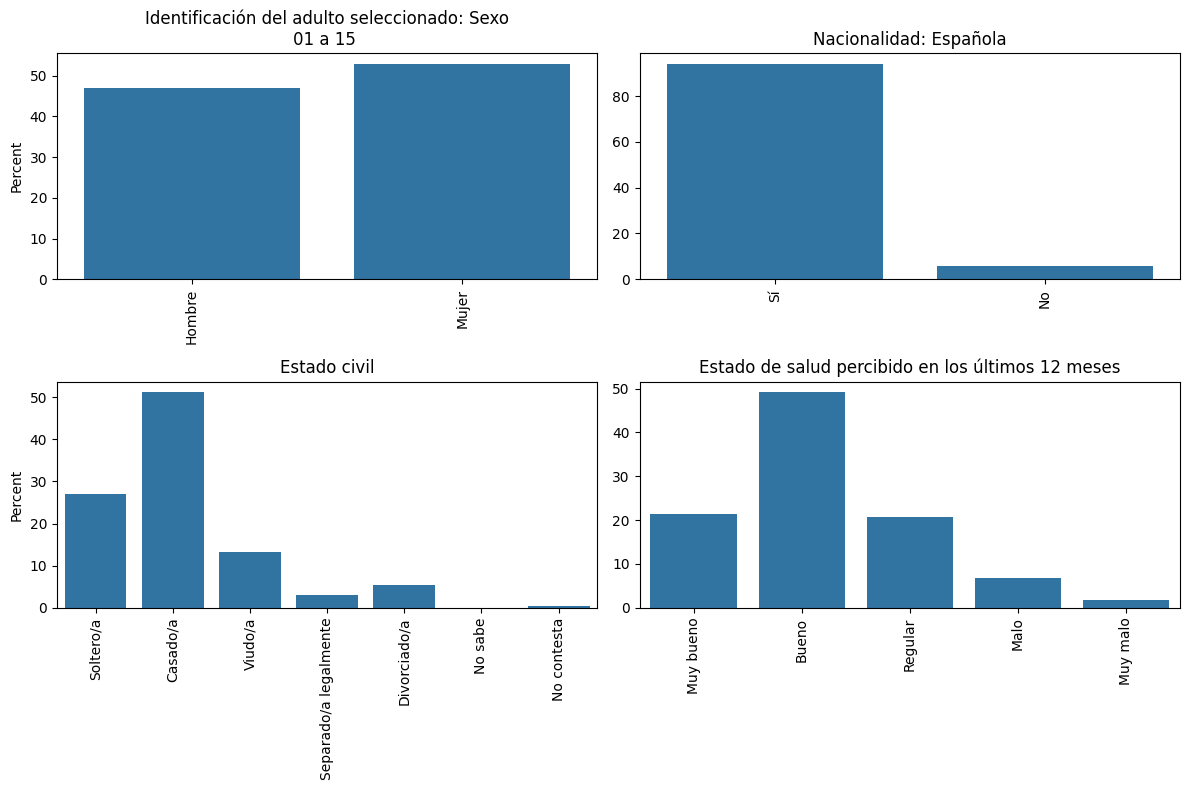

In [9]:
vars=['SEXOa','E2_1a', 'E4b', 'G21']
cols=2
rows=((len(clean_df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))

for col, ax in zip(clean_df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=clean_df, x=col, ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(categories,  rotation=90)

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')


#removing empty subplots
for i in range(len(clean_df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

In [10]:
def plot_single_numerical_variable(dataframe, column):

    fig, axis = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={'height_ratios': [6, 1]})

    # Calcula la media, mediana y desviación estándar de los datos
    media = np.mean(dataframe[column])
    mediana = np.median(dataframe[column])
    desviacion_estandar = np.std(dataframe[column])

    # Crear una figura múltiple con histogramas y diagramas de caja
    sns.histplot(ax=axis[0], data=dataframe, kde=True, x=column).set(xlabel=None)
    axis[0].axvline(media, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {media:.2f}' )
    axis[0].axvline(mediana, color='orange', linestyle='dashed', linewidth=1, label=f'Median: {mediana:.2f}')
    axis[0].axvline(media + desviacion_estandar, color='green', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {desviacion_estandar:.2f}')
    axis[0].axvline(media - desviacion_estandar, color='green', linestyle='dashed', linewidth=1)

    sns.boxplot(ax=axis[1], data=dataframe, x=column).set(xlabel=None)
    axis[1].axvline(media, color='red', linestyle='dashed', linewidth=1, label='Mean')
    axis[1].axvline(mediana, color='orange', linestyle='dashed', linewidth=1, label='Median')
    axis[1].axvline(media + desviacion_estandar, color='green', linestyle='dashed', linewidth=1)
    axis[1].axvline(media - desviacion_estandar, color='green', linestyle='dashed', linewidth=1)

    axis[0].legend()

    fig.suptitle(column)

    # Ajustar el layout
    plt.tight_layout()

    # Mostrar el plot
    plt.show()

# Uso del código
# Supongamos que 'data' es tu DataFrame y 'variable' es la columna que deseas graficar
# plot_single_numerical_variable(data, 'variable')


Participants are on average 55 years old and most of them are between 35 and 75 years old, approximately

/home/vscode/.local/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


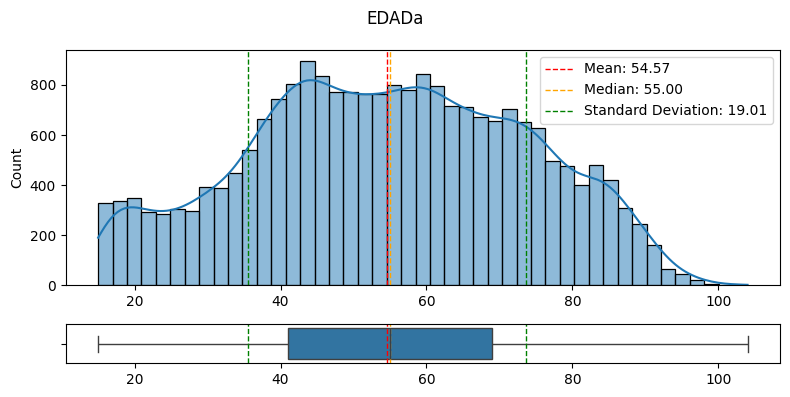

In [11]:
plot_single_numerical_variable(clean_df, 'EDADa')

Most participants live in the communities of Andalucia, Catalonia and Madrid

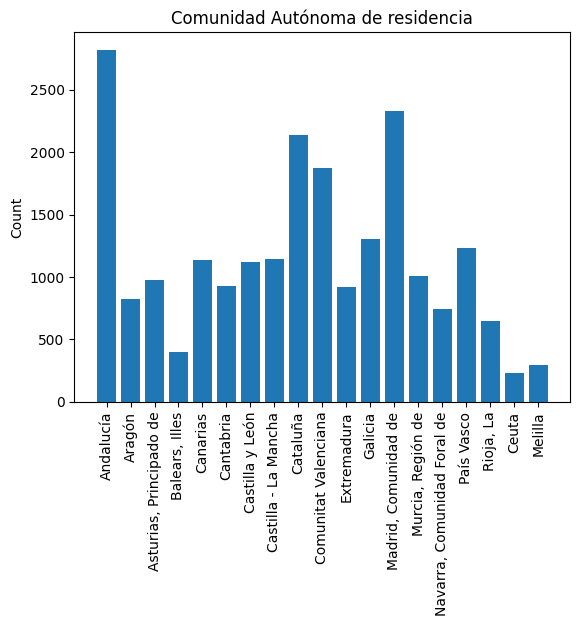

In [12]:
var_x = 'CCAA'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)

plt.xticks(values, categories, rotation = 90)

# Muestra el gráfico
plt.show()

## Life habits

**Comsumption of fast food and fruits:**
* More than 60% of participants report eating fast food less than once a week or never
* About 70% of participants report eating fruit one or more times per day

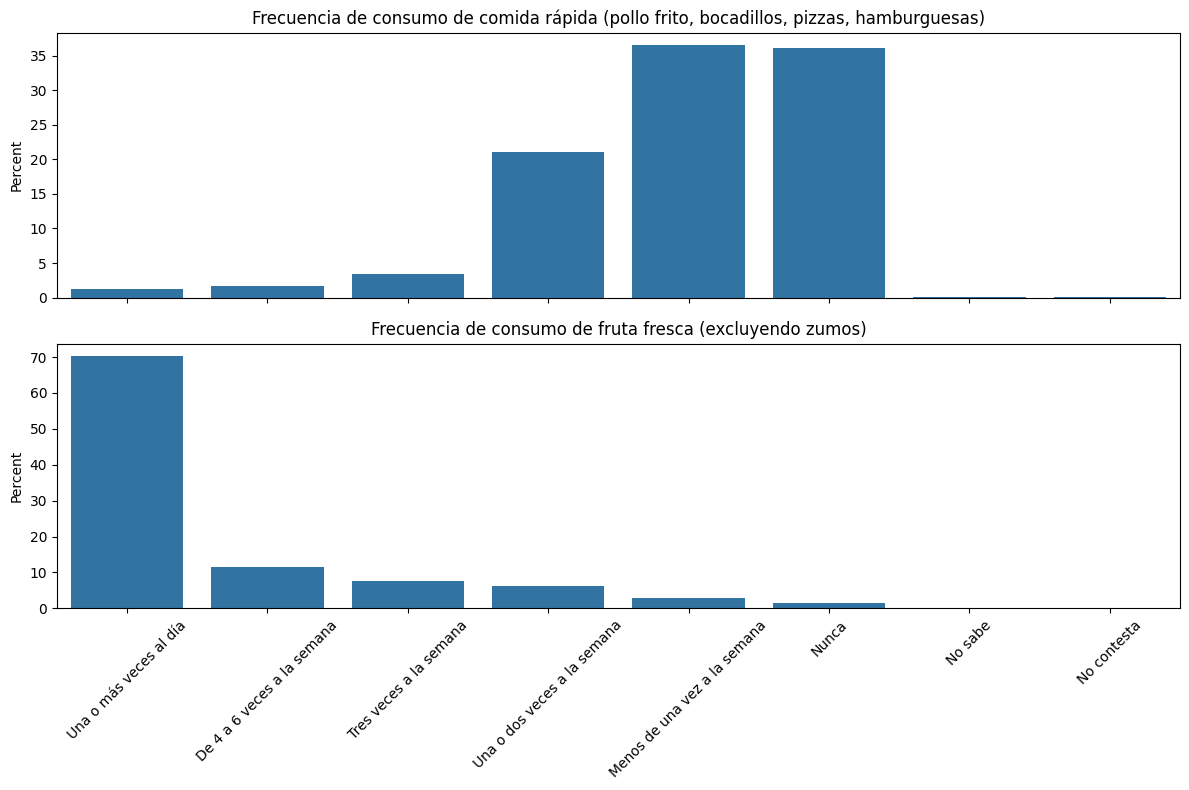

In [13]:
vars=['U120_13', 'U120_1']
cols=1
rows=((len(clean_df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))

for col, ax in zip(clean_df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=clean_df, x=col, ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('Percent')
  ax.set_xlabel('')

axis[1].set_xticks(range(len(values)))
axis[1].set_xticklabels(categories,  rotation=45)  
axis[0].set_xticklabels('') 

#removing empty subplots
for i in range(len(clean_df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

**Smoking**
* The majority of participants report the have never smoked 

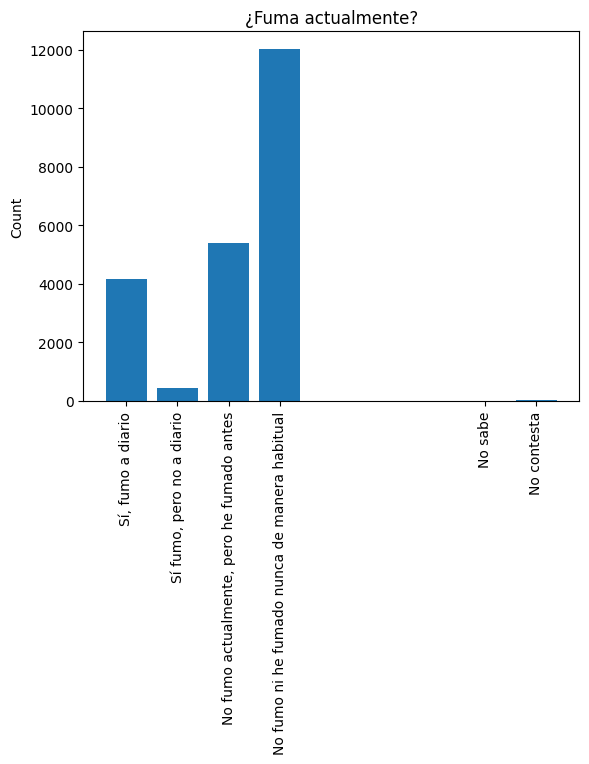

In [14]:
var_x = 'V121'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)


plt.xticks(values, categories, rotation = 90)

# Muestra el gráfico
plt.show()

## Depression/Anxiety-related variables

**Target variable: 'dep_anx'**

*  Approximately 10% of the partcipants report ever suffering from depression or anxiety

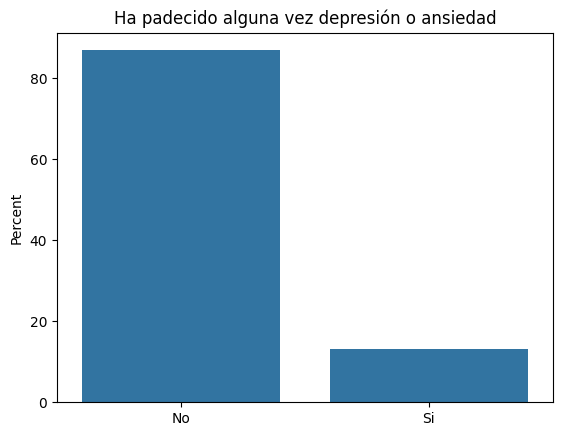

In [15]:
var_x = 'dep_anx'

# Crea el gráfico de barras
sns.countplot(data=clean_df, x='dep_anx', stat='percent')

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Percent')
plt.title('Ha padecido alguna vez depresión o ansiedad')

plt.xticks([0,1], ['No','Si'])

# Muestra el gráfico
plt.show()

**Ever consumed antidepressants or tranquilizers:**

*   Approximately 5% of participants report ever taken NOT prescribed antidepressants 
*   Approximately 5% of participants report ever taken prescribed antidepressants 
*   Approximately 10% of participants report ever taken NOT prescribed tranquilizers
*   Approximately 10% of participants report ever taken prescribed tranquilizers 

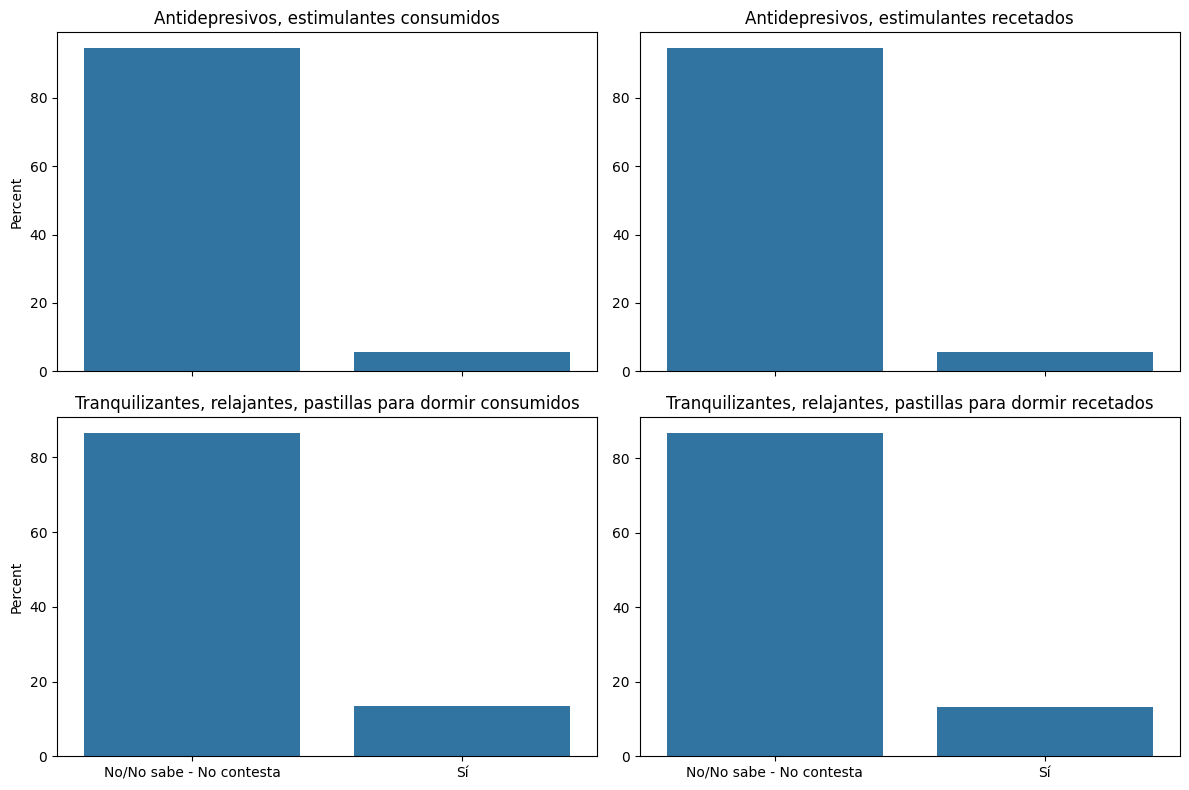

In [16]:
vars=['P87_14a', 'P87_14b', 'P87_7a', 'P87_7b']
cols=2
rows=((len(clean_df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))
for col, ax in zip(clean_df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=clean_df, x=col, ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(values)
  ax.set_xticklabels(categories)  

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')
axis[0,0].set_xticklabels('')  
axis[0,1].set_xticklabels('')  

#removing empty subplots
for i in range(len(clean_df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

We have also created several lineplots for the numerical variables or those with content where an ascending or descending progression can be observed. For this matter, we perform a query to filter out the extreme values, coded as 98 and 99, which represent NAs, in order to obtain a cleaner graph.

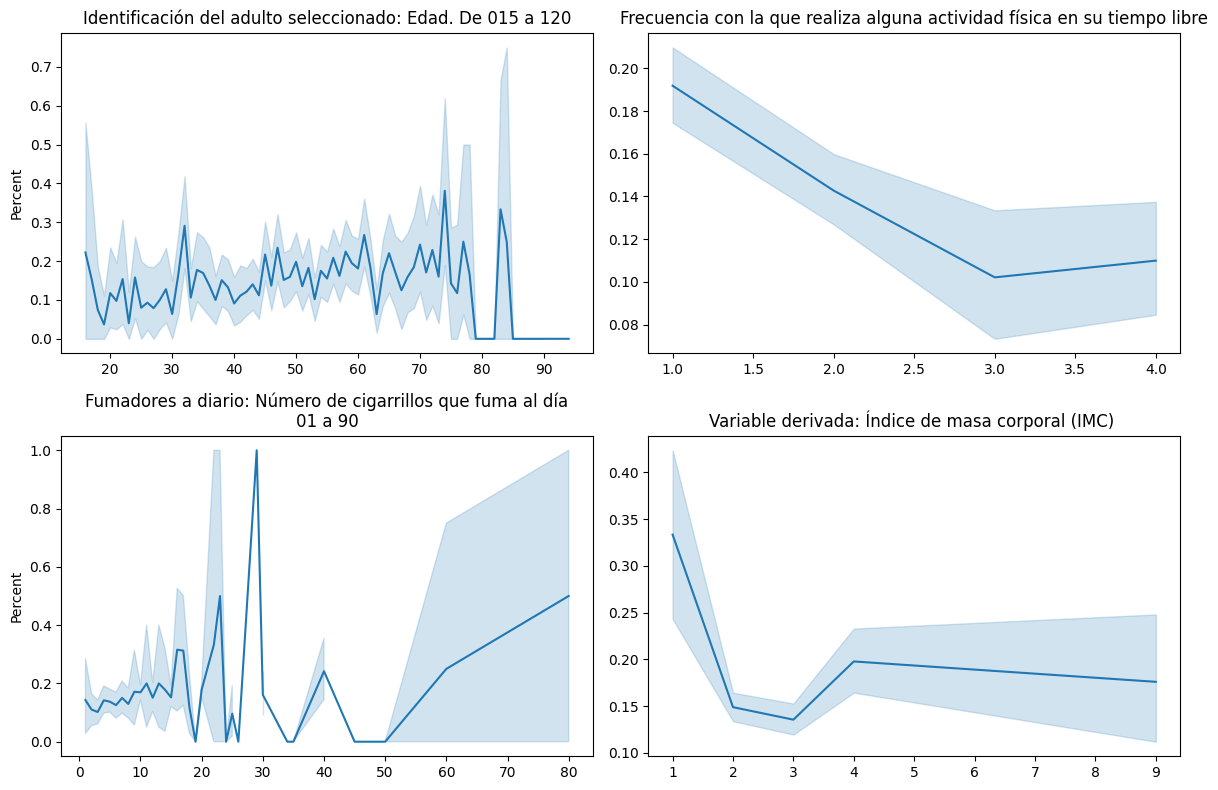

Target percentages:
dep_anx           0          1
EDADa                         
15.0      96.178344   3.821656
16.0      96.470588   3.529412
17.0      96.022727   3.977273
18.0      94.409938   5.590062
19.0      97.175141   2.824859
...             ...        ...
100.0    100.000000        NaN
101.0    100.000000        NaN
102.0    100.000000        NaN
103.0     50.000000  50.000000
104.0    100.000000        NaN

[90 rows x 2 columns]
dep_anx           0          1
T112                          
1.0       82.388936  17.611064
2.0       87.979570  12.020430
3.0       91.796701   8.203299
4.0       91.607087   8.392913
8.0      100.000000        NaN
9.0       76.470588  23.529412
dep_anx           0           1
V123                           
1.0       85.714286   14.285714
2.0       88.976378   11.023622
3.0       89.795918   10.204082
4.0       85.792350   14.207650
5.0       86.274510   13.725490
6.0       87.443946   12.556054
7.0       84.971098   15.028902
8.0       87.02702

In [21]:
df_copy = df.query('V123 < 90')
vars=['T112', 'V123', 'IMC']
cols=2
rows=((len(df_copy[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))

for col, ax in zip(df_copy[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.lineplot(data=df_copy, x=col, y = 'dep_anx', ax=ax)
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')


#removing empty subplots
for i in range(len(df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

# Multivariant Analysis

To analyze the distribution of each target value with respect to its associated columns, a function is defined to display pertinent information following each plot.

In [17]:
def percentage_dep_anx (valor):
    counts = df.groupby([valor, 'dep_anx']).size()
    counts_df = counts.unstack()
    percentage_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100
    print(percentage_df)

## Demographic variables vs dependent variable depression or anxiety: Countplots

Although most people in the survey said not suffering from depression or anxiety (DoA), we can still observe that among people with DoA: 

*  A higher percentage of women suffer from DoA relative to men
*  DoA seems more prevalent among people with Spanish nationality
*  Married people suffer more from DoA relative to single or widowed people
*  People who rate their health as regular or good, suffer from more DoA  

/home/vscode/.local/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/vscode/.local/lib/python3.11/site-packages/seabor

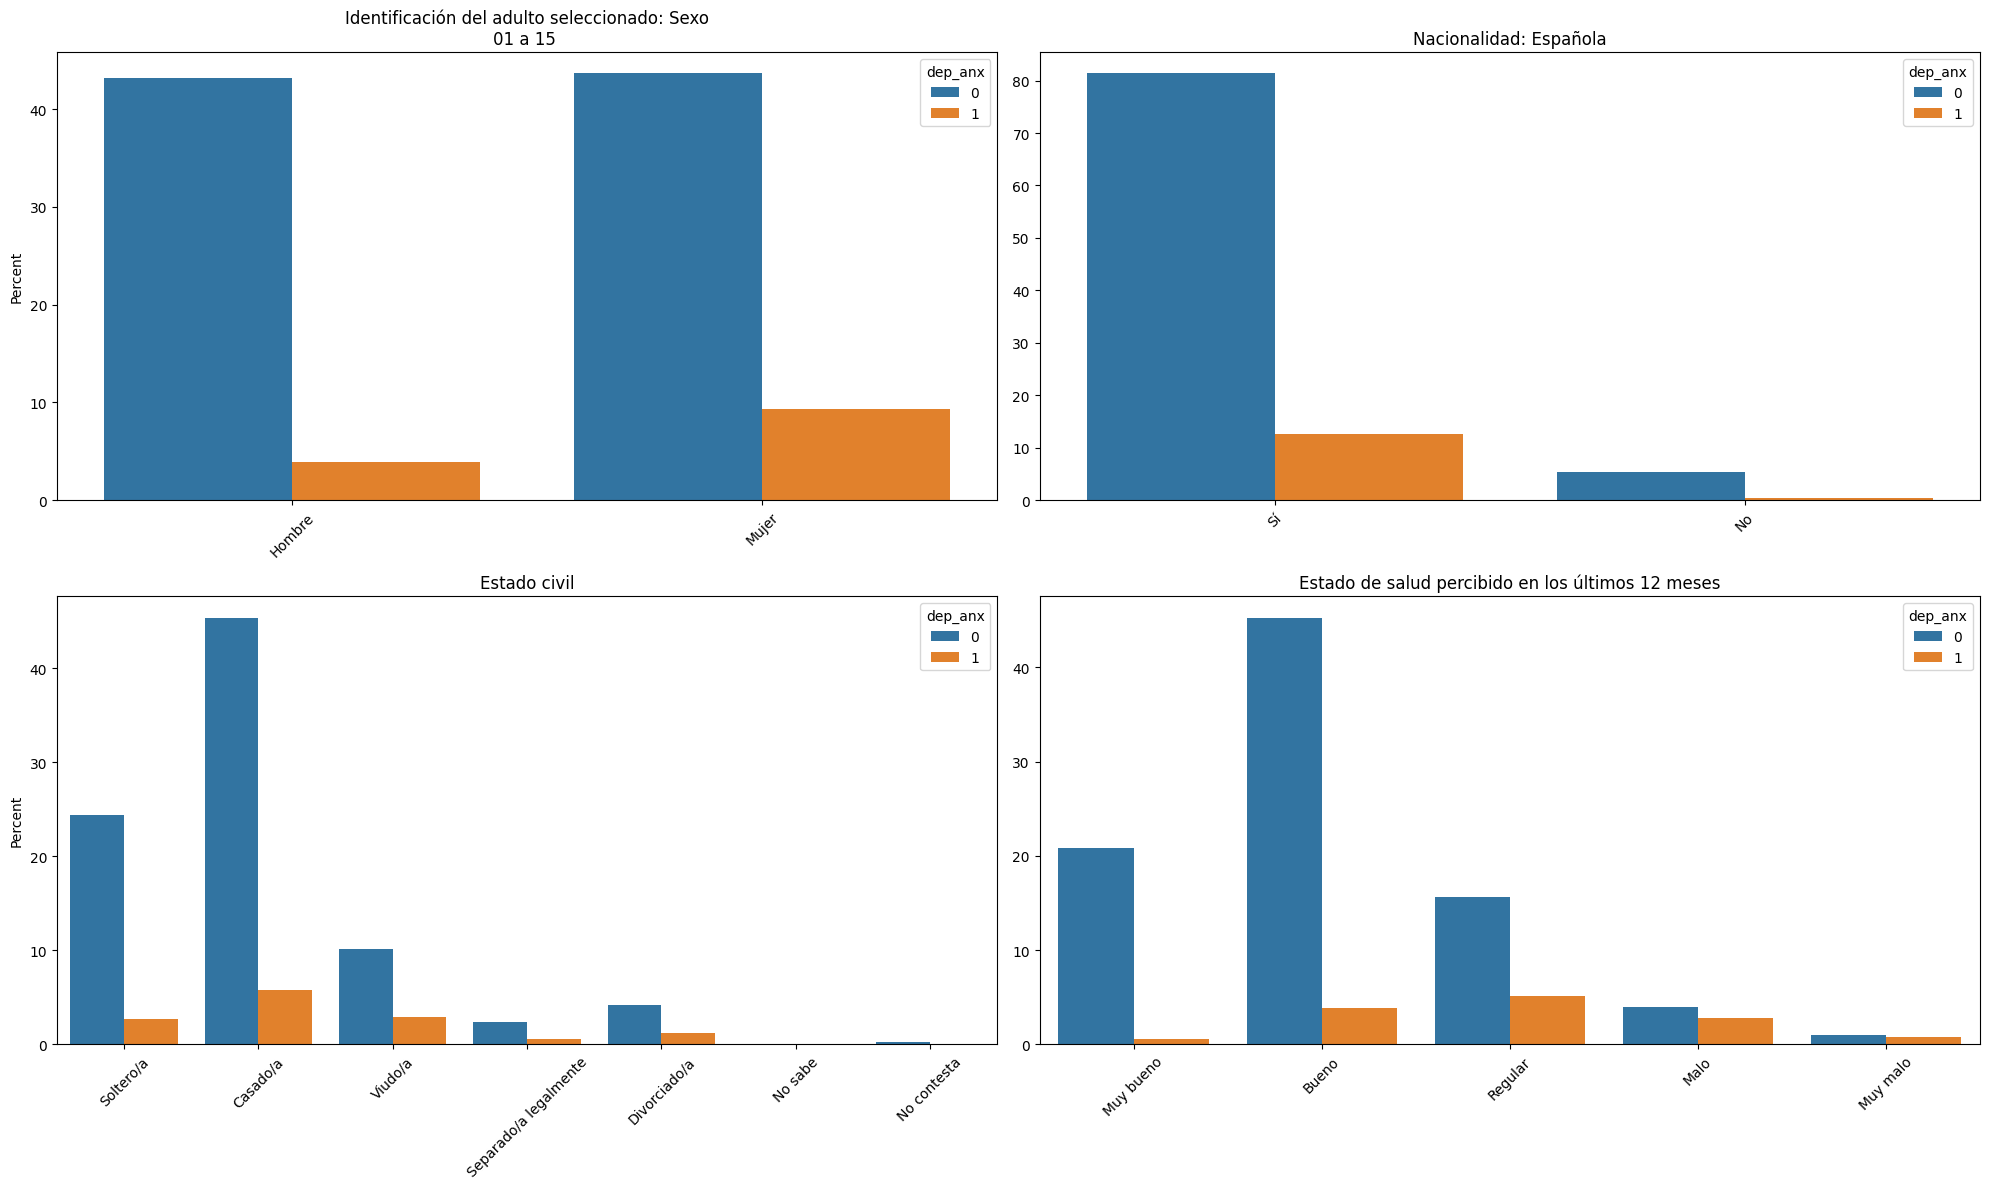

Target percentages:
dep_anx          0          1
SEXOa                        
1.0      91.742060   8.257940
2.0      82.443075  17.556925
dep_anx          0          1
E2_1a                        
1.0      86.501590  13.498410
2.0      91.856925   8.143075
dep_anx           0          1
E4b                           
1.0       90.112096   9.887904
2.0       88.682417  11.317583
3.0       77.658840  22.341160
4.0       80.461538  19.538462
5.0       78.021978  21.978022
8.0      100.000000        NaN
9.0       92.063492   7.936508
dep_anx          0          1
G21                          
1.0      97.128378   2.871622
2.0      92.111326   7.888674
3.0      75.375572  24.624428
4.0      58.941728  41.058272
5.0      56.641604  43.358396


In [18]:
vars=['SEXOa','E2_1a', 'E4b', 'G21']
cols=2
rows=((len(df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(20, rows * 6))

for col, ax in zip(df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=df, x=col, hue = 'dep_anx', ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(categories,  rotation=45) 

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')


#removing empty subplots
for i in range(len(df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

print("Target percentages:")
for i in vars:
    percentage_dep_anx(i)

## Dependent variable versus depressive episodes, autonomous community, smoking status and frequency of alcohol comsumption

*   People reporting not ever experiencing a depressive episode suffer more from depression or anxiety (DoA), relative to the remainig categories
*   Aragon, Catalonia, Valencian Community, and Galicia are some of the communities with the highest percentages of DoA
*   Non-smokers also how a higher percentage of suffering from DoA as compared to smokers
*   Similarly, people who report never drinking suffer more from DoA

/home/vscode/.local/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/vscode/.local/lib/python3.11/site-packages/seabor

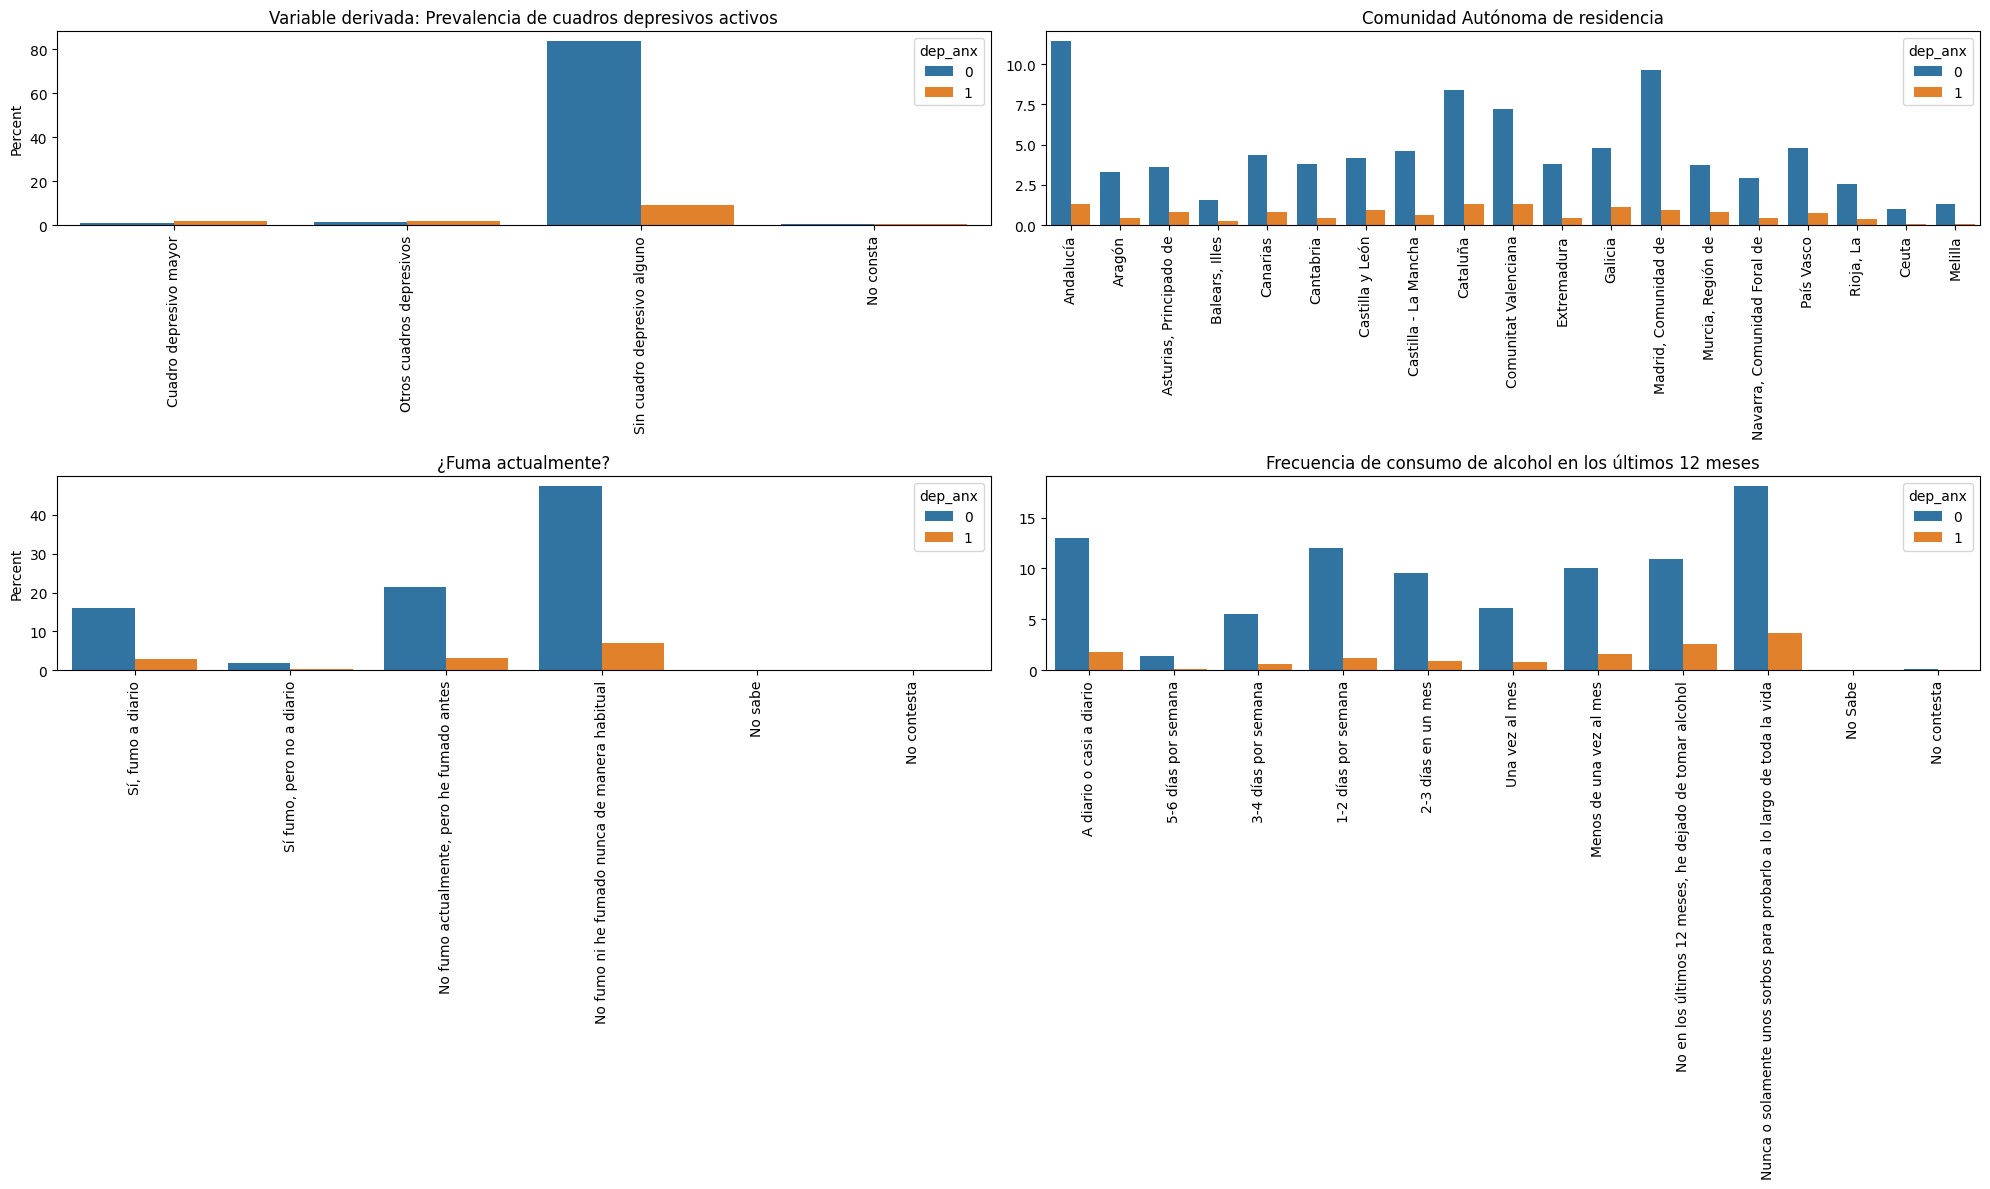

Target percentages:
dep_anx                     0          1
CUADROS_DEPRESIVOS                      
1.0                 28.064516  71.935484
2.0                 44.113667  55.886333
3.0                 90.301231   9.698769
9.0                 65.243902  34.756098
dep_anx          0          1
CCAA                         
1.0      89.680851  10.319149
2.0      88.915956  11.084044
3.0      81.307457  18.692543
4.0      85.858586  14.141414
5.0      84.007030  15.992970
6.0      90.096878   9.903122
7.0      81.761566  18.238434
8.0      88.568935  11.431065
9.0      86.529467  13.470533
10.0     84.866310  15.133690
11.0     90.249187   9.750813
12.0     80.674847  19.325153
13.0     91.147400   8.852600
14.0     81.827210  18.172790
15.0     87.148594  12.851406
16.0     86.086249  13.913751
17.0     87.500000  12.500000
18.0     92.241379   7.758621
19.0     96.598639   3.401361
dep_anx          0          1
V121                         
1.0      84.370512  15.629488
2.0      88.91

In [19]:
vars=['CUADROS_DEPRESIVOS', 'CCAA','V121', 'W127']
cols=2
rows=((len(df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(20, rows * 6))

for col, ax in zip(df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=df, x=col, hue = 'dep_anx', ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(categories,  rotation=45) 

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')


#removing empty subplots
for i in range(len(df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

print("Target percentages:")
for i in vars:
     percentage_dep_anx(i)

## Depression or anxiety versus eating habits

Among people who suffer from depression or anxiety (DoA):

*  A higher percentage of people who eat vegetable or fruits often, suffer from DoA
*  A higher percentage of people who never eat fast food, sugary drinks or snacks, suffer from DoA  

/home/vscode/.local/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/vscode/.local/lib/python3.11/site-packages/seabor

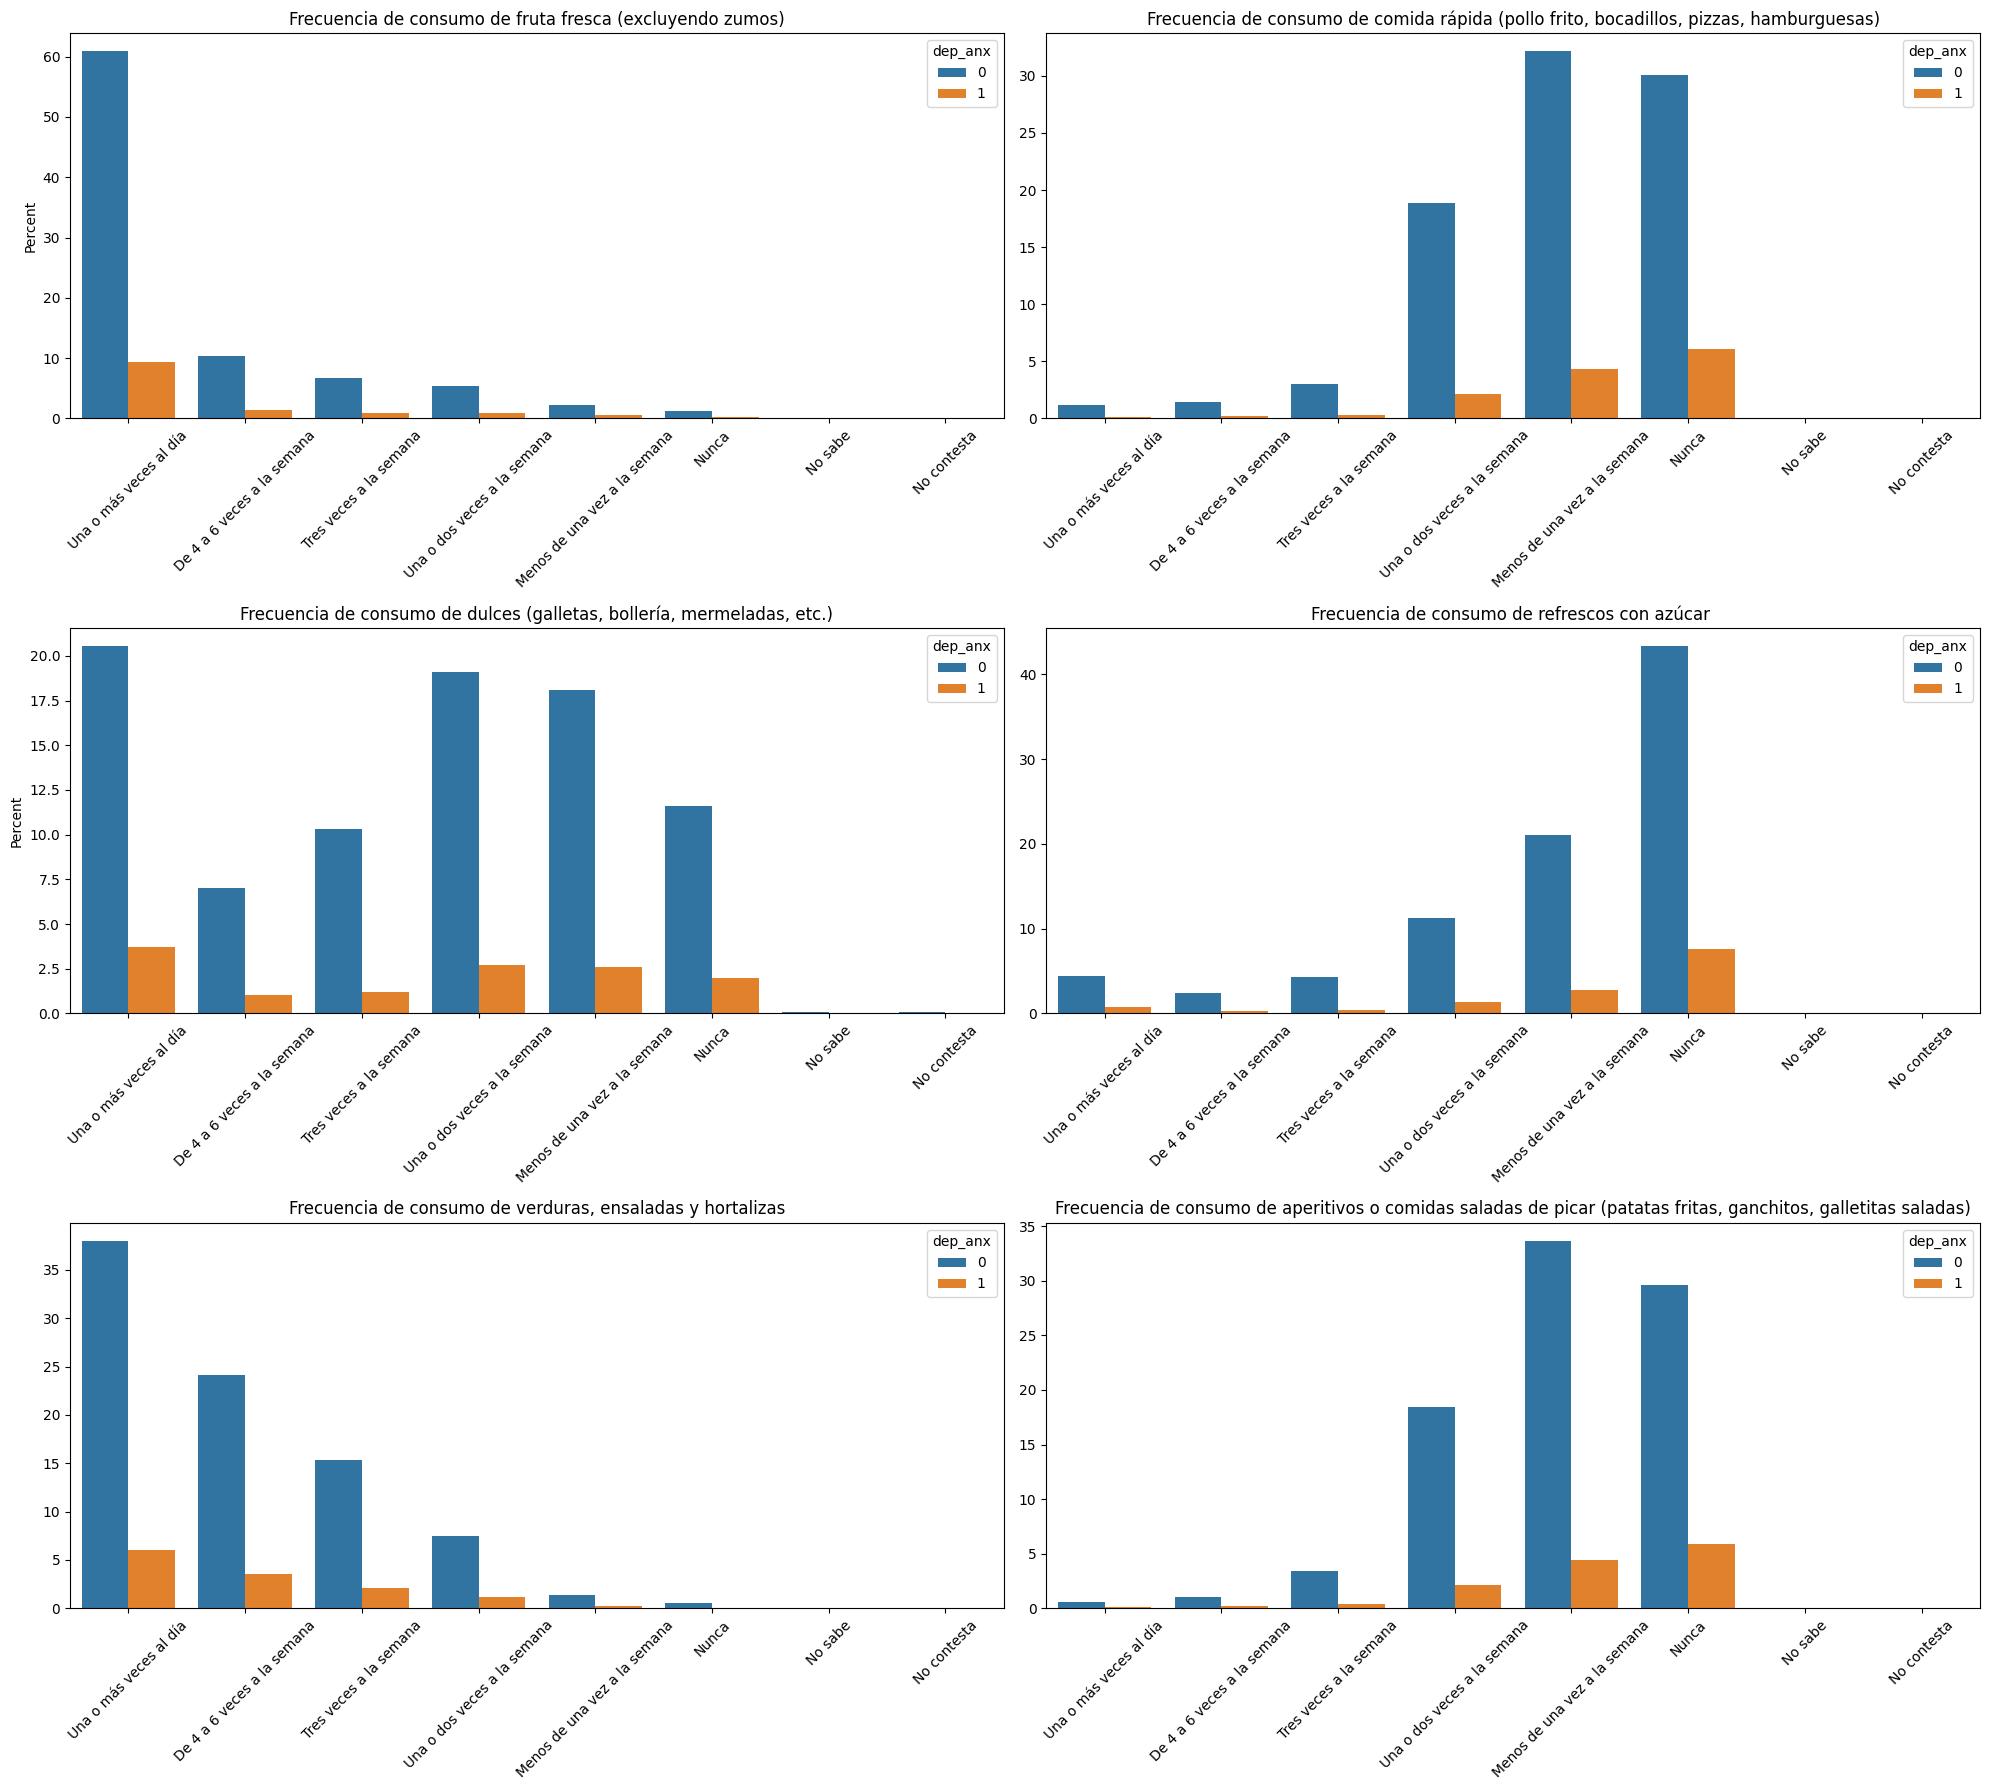

Target percentages:
dep_anx           0          1
U120_1                        
1.0       86.686009  13.313991
2.0       88.356698  11.643302
3.0       87.969029  12.030971
4.0       87.101449  12.898551
5.0       82.815057  17.184943
6.0       81.229773  18.770227
8.0      100.000000        NaN
9.0       83.333333  16.666667
dep_anx          0          1
U120_13                      
1.0      90.459364   9.540636
2.0      87.500000  12.500000
3.0      90.161725   9.838275
4.0      89.769546  10.230454
5.0      88.219212  11.780788
6.0      83.239171  16.760829
8.0      71.428571  28.571429
9.0      88.888889  11.111111
dep_anx          0          1
U120_11                      
1.0      84.703026  15.296974
2.0      87.457627  12.542373
3.0      89.704142  10.295858
4.0      87.676642  12.323358
5.0      87.461707  12.538293
6.0      85.509182  14.490818
8.0      73.333333  26.666667
9.0      85.714286  14.285714
dep_anx          0          1
U120_12                      
1.0      8

In [20]:
vars=['U120_1','U120_13', 'U120_11', 'U120_12', 'U120_7', 'U120_14']
cols=2
rows=((len(df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(20, rows * 6))

for col, ax in zip(df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=df, x=col, hue = 'dep_anx', ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(categories,  rotation=45) 

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')


#removing empty subplots
for i in range(len(df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

print("Target percentages:")
for i in vars:
     percentage_dep_anx(i)

## Relations of 3

In this final part of the multivariate graphs, we will examine the relationship between three variables to observe various factors, in this case, related to the autonomous communities.

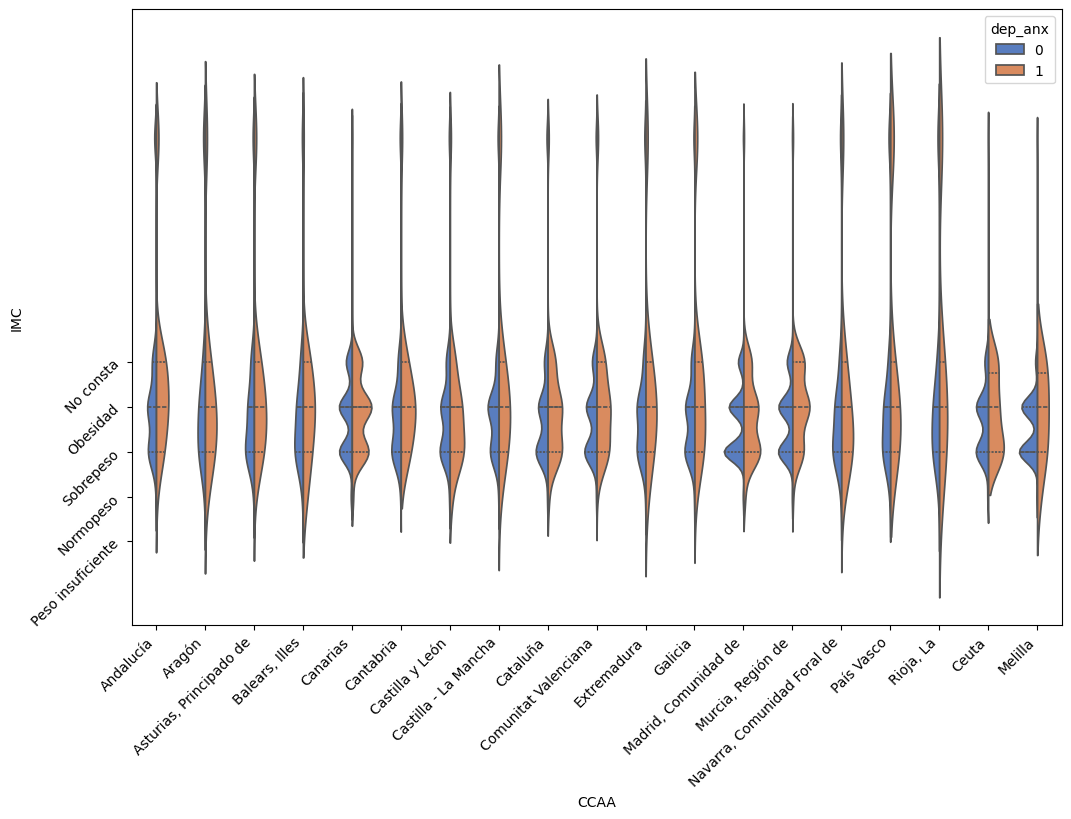

In [22]:
_,categories_CCAA, _ = parse_json('CCAA')
_,categories_IMC, _ = parse_json('IMC')

plt.figure(figsize=(12, 8))
sns.violinplot(x='CCAA', y='IMC', hue='dep_anx', data=df, palette="muted", split = True, inner = "quartile")
plt.yticks(range(len(categories_IMC)), categories_IMC, rotation=45, ha='right')
plt.xticks(range(len(categories_CCAA)), categories_CCAA, rotation=45, ha='right')
plt.show()

In [50]:
print(parse_json('W127'))
print(parse_json('V121'))

#REVISAR ESTA PARTE:

([1, 2, 3, 4, 5, 6, 7, 8, 9, 98, 99], ['A diario o casi a diario', '5-6 días por semana', '3-4 días por semana', '1-2 días por semana', '2-3 días en un mes', 'Una vez al mes', 'Menos de una vez al mes', 'No en los últimos 12 meses, he dejado de tomar alcohol', 'Nunca o solamente unos sorbos para probarlo a lo largo de toda la vida', 'No Sabe', 'No contesta'], 'Frecuencia de consumo de alcohol en los últimos 12 meses')
([1, 2, 3, 4, 8, 9], ['Sí, fumo a diario', 'Sí fumo, pero no a diario', 'No fumo actualmente, pero he fumado antes', 'No fumo ni he fumado nunca de manera habitual', 'No sabe', 'No contesta'], '¿Fuma actualmente?')


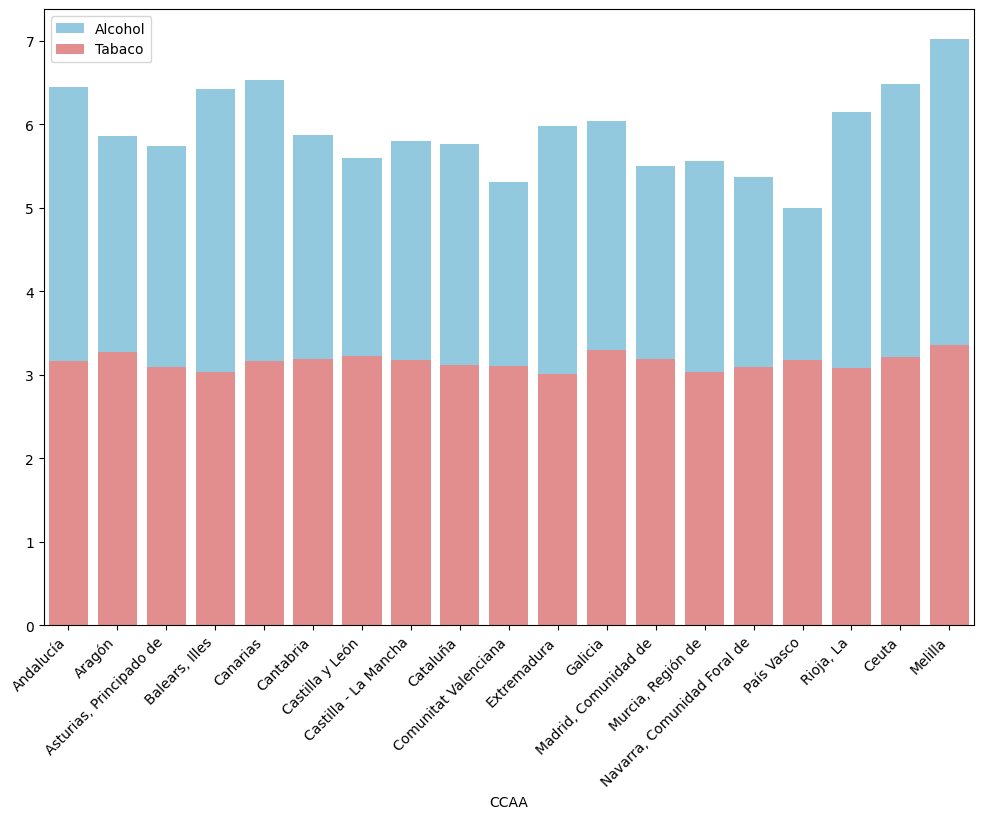

In [23]:
_,categories_1, _ = parse_json('CCAA')

plt.figure(figsize=(12, 8))

sns.barplot(x='CCAA', y='W127', data=df, color='skyblue', errorbar=None, label='Alcohol')
sns.barplot(x='CCAA', y='V121', data=df, color='lightcoral', errorbar=None, label='Tabaco')
plt.xticks(range(len(categories_1)), categories_1, rotation=45, ha='right')
plt.ylabel(None)
plt.show()

### Analysis missings values

In [24]:
columnas_con_nan = clean_df.columns[df.isna().any()].tolist()

df_faltantes = clean_df[columnas_con_nan]

columnas_con_nan



['E3',
 'F6',
 'F13',
 'F15',
 'F16',
 'F17',
 'F18a_2',
 'F18b_2',
 'F19a_2',
 'F19b_2',
 'F20',
 'G24',
 'H27',
 'J31',
 'K33',
 'K35',
 'K36',
 'K38b',
 'L39_1',
 'L39_2',
 'L39_3',
 'L39_4',
 'L39_5',
 'L40',
 'L41',
 'L42_1',
 'L42_2',
 'L42_3',
 'L42_4',
 'L42_5',
 'L42_6',
 'L42_7',
 'L43',
 'L44',
 'N49',
 'N51',
 'N62b',
 'N64',
 'O67',
 'O68',
 'O71',
 'O74',
 'O76',
 'O79',
 'O81_1',
 'O81_2',
 'O81_3',
 'O82_1',
 'O82_2',
 'O83',
 'Q90',
 'Q92',
 'Q94',
 'Q96',
 'Q99',
 'Q101',
 'Q104',
 'T114',
 'T116',
 'T118_1',
 'T118_2',
 'V123',
 'V124',
 'V124b',
 'V126a',
 'V126c',
 'W129']

In [25]:
clean_df.drop(columnas_con_nan, axis=1, inplace=True)

In [26]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22072 entries, 0 to 22071
Columns: 275 entries, CCAA to dep_anx
dtypes: float64(63), int64(212)
memory usage: 46.3 MB


In [27]:
ruta_final ='../data/interim/df_final_final.csv'

clean_df.to_csv(ruta_final, index=False)

In [28]:
import json

def cambiar_nombres_desde_json(dataframe, ruta_json):
    # Compruebo que puedo cargar el JSON
    with open(ruta_json, 'r') as file:
        nombres_nuevos = json.load(file)

    df_con_nombres = dataframe.copy()  # Crear una copia del DataFrame para evitar modificar el original
    
    for columna in dataframe.columns:
        nuevo_nombre = nombres_nuevos.get(columna, {}).get('Descripción', columna)
        df_con_nombres.rename(columns={columna:f'{columna};{nuevo_nombre}' }, inplace=True)

    return df_con_nombres

## Split Train test

In [29]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = clean_df.drop("dep_anx", axis = 1)
y = clean_df["dep_anx"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k = 50)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()


X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

cambiar_nombres_desde_json(X_train_sel, '../data/json_files/var_dict.json').columns



/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Index(['G21;Estado de salud percibido en los últimos 12 meses',
       'G22;Enfermedad o problema de salud crónicos o de larga duración',
       'G23;Grado de limitación durante al menos 6 meses por un problema de salud',
       'G24a;Estado de salud bucodental',
       'G25a_5;Ha padecido alguna vez: Varices en las piernas',
       'G25b_5;Ha padecido en los últimos 12 meses: Varices en las piernas',
       'G25a_6;Ha padecido alguna vez: Artrosis (excluyendo artritis)',
       'G25b_6;Ha padecido en los últimos 12 meses: Artrosis (excluyendo artritis)',
       'G25c_6;Diagnóstico médico: Artrosis (excluyendo artritis)',
       'G25a_7;Ha padecido alguna vez: Dolor de espalda crónico (cervical)',
       'G25b_7;Ha padecido en los últimos 12 meses: Dolor de espalda crónico (cervical)',
       'G25c_7;Diagnóstico médico: Dolor de espalda crónico (cervical)',
       'G25a_8;Ha padecido alguna vez: Dolor de espalda crónico (lumbar)',
       'G25b_8;Ha padecido en los últimos 12 meses: Dol

In [30]:
clean_df[['P87_7a','P87_7b','P87_13a','P87_13b','P87_14a','P87_14b']]

,P87_7a,P87_7b,P87_13a,P87_13b,P87_14a,P87_14b
0,0,0,0,0,0,0
1,1,1,1,1,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
22067,0,0,0,0,0,0
22068,0,0,0,0,0,0
22069,0,0,0,0,0,0
22070,0,0,0,0,0,0


In [31]:
lista_medicas = ['G25b_1',
 'G25b_2',
 'G25b_3',
 'G25b_4',
 'G25b_5',
 'G25b_6',
 'G25b_7',
 'G25b_8',
 'G25b_9',
 'G25b_10',
 'G25b_11',
 'G25b_12',
 'G25b_13',
 'G25b_14',
 'G25b_15',
 'G25b_16',
 'G25b_17',
 'G25b_18',
 'G25b_19',
 'G25b_22',
 'G25b_23',
 'G25b_24',
 'G25b_25',
 'G25b_26',
 'G25b_27',
 'G25b_28',
 'G25b_29',
 'G25b_30',
 'G25b_31',
 'G25b_32',
 'G25c_1',
 'G25c_2',
 'G25c_3',
 'G25c_4',
 'G25c_5',
 'G25c_6',
 'G25c_7',
 'G25c_8',
 'G25c_9',
 'G25c_10',
 'G25c_11',
 'G25c_12',
 'G25c_13',
 'G25c_14',
 'G25c_15',
 'G25c_16',
 'G25c_17',
 'G25c_18',
 'G25c_19',
 'G25c_22',
 'G25c_23',
 'G25c_24',
 'G25c_25',
 'G25c_26',
 'G25c_27',
 'G25c_28',
 'G25c_29',
 'G25c_30',
 'G25c_31',
 'G25c_32']

In [32]:
clean_df.drop(lista_medicas, axis=1, inplace=True)

segunda tanda de limpieza 

In [33]:
lista_preescrip = ['P87_1a',
 'P87_1b',
 'P87_2a',
 'P87_2b',
 'P87_3a',
 'P87_3b',
 'P87_4a',
 'P87_4b',
 'P87_5a',
 'P87_5b',
 'P87_6a',
 'P87_6b',
 'P87_7a',
 'P87_7b',
 'P87_8a',
 'P87_8b',
 'P87_9a',
 'P87_9b',
 'P87_10a',
 'P87_10b',
 'P87_11a',
 'P87_11b',
 'P87_12a',
 'P87_12b',
 'P87_13a',
 'P87_13b',
 'P87_14a',
 'P87_14b',
 'P87_15a',
 'P87_15b',
 'P87_16a',
 'P87_16b',
 'P87_17a',
 'P87_17b',
 'P87_18a',
 'P87_18b',
 'P87_19a',
 'P87_19b',
 'P87_20a',
 'P87_20b',
 'P87_21a',
 'P87_21b',
 'P87_22a',
 'P87_22b',
 'P87_23a',
 'P87_23b']

In [34]:
nombres_termina_a = []
nombres_termina_b = []




# Iterar sobre la lista original
for nombre in lista_preescrip:
    # Verificar si el nombre termina en 'a'
    if nombre.endswith('a') or nombre.endswith('A'):
        nombres_termina_a.append(nombre)
    # Verificar si el nombre termina en 'b'
    elif nombre.endswith('b') or nombre.endswith('B'):
        nombres_termina_b.append(nombre)

In [35]:
def quedarme_con_los_unos(dataframe,a, b):
    dataframe[f'{a}_nuevo'] = 0
    dataframe.loc[(df[a] == 1) | (dataframe[b] == 1), f'{a}_nuevo'] = 1
    dataframe[f'{a}_nuevo'] = (dataframe[f'{a}_nuevo'] == 1).astype(int)


In [36]:
quedarme_con_los_unos(clean_df,'P87_1a','P87_1b')

In [37]:
clean_df['P87_1a_nuevo']

0        0
1        1
2        0
3        0
4        0
        ..
22067    0
22068    0
22069    0
22070    0
22071    0
Name: P87_1a_nuevo, Length: 22072, dtype: int64

In [38]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22072 entries, 0 to 22071
Columns: 216 entries, CCAA to P87_1a_nuevo
dtypes: float64(63), int64(153)
memory usage: 36.4 MB


In [39]:
for a, b in zip(nombres_termina_a, nombres_termina_b):
    quedarme_con_los_unos(clean_df,a,b)

    clean_df.drop([a,b], axis=1, inplace=True)

In [40]:
quedarme_con_los_unos(clean_df,'P85','P86')

clean_df.drop(['P85','P86'], axis=1, inplace=True)

In [41]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22072 entries, 0 to 22071
Columns: 191 entries, CCAA to P85_nuevo
dtypes: float64(63), int64(128)
memory usage: 32.2 MB


In [42]:
nuevas_columnas = clean_df.filter(like='nuevo', axis=1)
nuevas_columnas

,P87_1a_nuevo,P87_2a_nuevo,P87_3a_nuevo,P87_4a_nuevo,P87_5a_nuevo,P87_6a_nuevo,P87_7a_nuevo,P87_8a_nuevo,P87_9a_nuevo,P87_10a_nuevo,...,P87_15a_nuevo,P87_16a_nuevo,P87_17a_nuevo,P87_18a_nuevo,P87_19a_nuevo,P87_20a_nuevo,P87_21a_nuevo,P87_22a_nuevo,P87_23a_nuevo,P85_nuevo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
22070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [43]:
clean_df.to_csv('../data/interim/final_3dot1.csv',index=False)

Split and select k bests

In [44]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = clean_df.drop("dep_anx", axis = 1)
y = clean_df["dep_anx"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k = 50)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()


X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

cambiar_nombres_desde_json(X_train_sel, '../data/json_files/var_dict.json').columns



/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Index(['SEXOa;Identificación del adulto seleccionado: Sexo\n01 a 15 ',
       'EDADa;Identificación del adulto seleccionado: Edad. De 015 a 120',
       'ESTUDIOS;Nivel de estudios del adulto seleccionado',
       'G21;Estado de salud percibido en los últimos 12 meses',
       'G22;Enfermedad o problema de salud crónicos o de larga duración',
       'G23;Grado de limitación durante al menos 6 meses por un problema de salud',
       'G24a;Estado de salud bucodental',
       'G25a_1;Ha padecido alguna vez: Tensión alta',
       'G25a_5;Ha padecido alguna vez: Varices en las piernas',
       'G25a_6;Ha padecido alguna vez: Artrosis (excluyendo artritis)',
       'G25a_7;Ha padecido alguna vez: Dolor de espalda crónico (cervical)',
       'G25a_8;Ha padecido alguna vez: Dolor de espalda crónico (lumbar)',
       'G25a_14;Ha padecido alguna vez: Incontinencia urinaria o problemas de control de la orina',
       'G25a_15;Ha padecido alguna vez: Colesterol alto',
       'G25a_16;Ha padecido a

In [45]:
X_train_sel.to_csv("../data/processed/X_train.csv", index=False)
X_test_sel.to_csv("../data/processed/X_test.csv", index=False)

In [46]:
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

prueba


In [47]:
clean_df.columns

Index(['CCAA', 'SEXOa', 'EDADa', 'E1_1', 'E1C', 'E1E', 'E2_1a', 'E2_1b',
       'E2_1c', 'E2_1d',
       ...
       'P87_15a_nuevo', 'P87_16a_nuevo', 'P87_17a_nuevo', 'P87_18a_nuevo',
       'P87_19a_nuevo', 'P87_20a_nuevo', 'P87_21a_nuevo', 'P87_22a_nuevo',
       'P87_23a_nuevo', 'P85_nuevo'],
      dtype='object', length=191)

#### Mas variables a eliminar

In [48]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.model_selection import train_test_split


lista_a_eliminar = ['P87_14a_nuevo', 'P87_7a_nuevo', 'SEVERIDAD_DEPRESIVA', 'CUADROS_DEPRESIVOS', "dep_anx"]

# We divide the dataset into training and test samples.
X = clean_df.drop(lista_a_eliminar, axis = 1)
y = clean_df["dep_anx"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k = 50)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()


X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

cambiar_nombres_desde_json(X_train_sel, '../data/json_files/var_dict.json').columns



/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Index(['SEXOa;Identificación del adulto seleccionado: Sexo\n01 a 15 ',
       'EDADa;Identificación del adulto seleccionado: Edad. De 015 a 120',
       'ESTUDIOS;Nivel de estudios del adulto seleccionado',
       'G21;Estado de salud percibido en los últimos 12 meses',
       'G22;Enfermedad o problema de salud crónicos o de larga duración',
       'G23;Grado de limitación durante al menos 6 meses por un problema de salud',
       'G24a;Estado de salud bucodental',
       'G25a_1;Ha padecido alguna vez: Tensión alta',
       'G25a_5;Ha padecido alguna vez: Varices en las piernas',
       'G25a_6;Ha padecido alguna vez: Artrosis (excluyendo artritis)',
       'G25a_7;Ha padecido alguna vez: Dolor de espalda crónico (cervical)',
       'G25a_8;Ha padecido alguna vez: Dolor de espalda crónico (lumbar)',
       'G25a_11;Ha padecido alguna vez: Bronquitis crónica, enfisema, enfermedad pulmonar obstructiva crónica (EPOC)',
       'G25a_14;Ha padecido alguna vez: Incontinencia urinaria o pro

In [49]:
X_train_sel.to_csv("../data/processed/more_drop_variable/X_train_2.csv", index=False)
X_test_sel.to_csv("../data/processed/more_drop_variable/X_test_2.csv", index=False)

y_train.to_csv("../data/processed/more_drop_variable/y_train_2.csv", index=False)
y_test.to_csv("../data/processed/more_drop_variable/y_test_2.csv", index=False)


